# **Data Science Track: Course 18**
# **Unsupervised Learning in Python**

# Chap 1: Exploring the raw data

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

### Exploring the data

In [2]:
# A column for each possible value

face_df = pd.DataFrame({'Eyes':['Brown','Brown','Blue','Blue'],
                   'Hair':['Curly','Straight','Wavy','Straight']},
                  index=['Jamal','Luisa','Jenny','Max'])
face_df

,Eyes,Hair
Jamal,Brown,Curly
Luisa,Brown,Straight
Jenny,Blue,Wavy
Max,Blue,Straight


In [3]:
face_df_dummies = pd.get_dummies(face_df)
face_df_dummies

,Eyes_Blue,Eyes_Brown,Hair_Curly,Hair_Straight,Hair_Wavy
Jamal,0,1,1,0,0
Luisa,0,1,0,1,0
Jenny,1,0,0,0,1
Max,1,0,0,1,0


In [4]:
# Load and preview the data
sample_df = pd.read_csv('datasets/sample_data.csv',index_col=0)
sample_df.text.fillna('',inplace=True)
sample_df.head()

,numeric,text,with_missing,label
0,-10.856306,,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [5]:
# Summarize the data
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
numeric         1000 non-null float64
text            1000 non-null object
with_missing    822 non-null float64
label           1000 non-null object
dtypes: float64(2), object(2)
memory usage: 39.1+ KB


In [6]:
sample_df.describe()

,numeric,with_missing
count,1000.000000,822.000000
mean,-0.395641,3.025194
std,10.012883,0.994960
min,-32.310550,-0.801378
25%,-6.845565,2.386520
50%,-0.411856,3.022887
75%,6.688658,3.693381
max,35.715792,5.850708


In [7]:
# EXERCISES

In [8]:
# Loading the data
df = pd.read_csv('datasets/drivendata/TrainingData.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    179964 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08


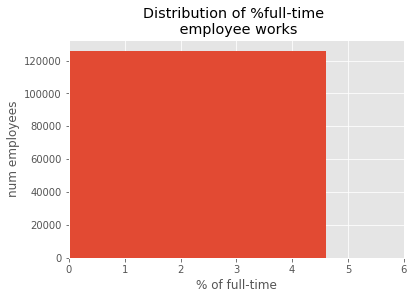

In [9]:
# Summarizing the data

# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.xlim([0,6])

# Display the histogram
plt.show()

### Looking at the datatypes

Why encode labels as categories?
    - ML algorithms work on numbers, not strings
    - Strings can be slow compared to numbers (take more space)

In [10]:
# Encode labels as categories (sample data)

sample_df.label.head(2)

0    b
1    b
Name: label, dtype: object

In [11]:
sample_df.label = sample_df.label.astype('category')
sample_df.label.head(2)

0    b
1    b
Name: label, dtype: category
Categories (2, object): [a, b]

In [12]:
# Dummy variable encoding

dummies = pd.get_dummies(sample_df[['label']], prefix_sep='_')
dummies.head(2)

,label_a,label_b
0,0,1
1,0,1


In [13]:
# Lambda functions

square = lambda x: x*x
square(2)

4

In [14]:
# Encode labels as categories

categorize_label = lambda x: x.astype('category')
sample_df[['label']] = sample_df[['label']].apply(categorize_label,axis=0)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
numeric         1000 non-null float64
text            1000 non-null object
with_missing    822 non-null float64
label           1000 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 32.3+ KB


In [15]:
# EXERCISES

In [16]:
# Exploring datatypes in pandas
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

In [17]:
# Encode the labels as categorical variables
LABELS = ['Function','Use','Sharing','Reporting','Student_Type',
          'Position_Type','Object_Type','Pre_K','Operating_Status']

In [18]:
df[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

In [19]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label,axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


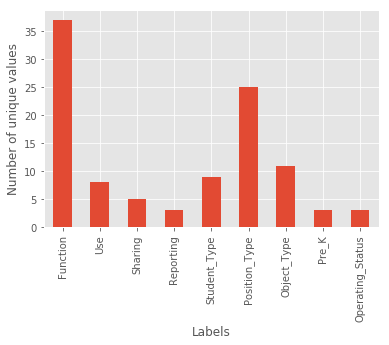

In [20]:
# Counting unique labels

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(lambda x: pd.Series.nunique(x))

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

### How do we measure success?

Log loss binary classification  
logloss(N=1) = y log(p) + (1-y) log(1-p)

In [21]:
# Computing log loss with NumPy

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
        actual when these are 1D arrays.
    
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our
                           predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                        + (1 - actual) * np.log(1 - predicted))
    return loss

In [22]:
compute_log_loss(predicted=0.9, actual=0)

2.3025850929940459

In [23]:
compute_log_loss(predicted=0.5, actual=1)

0.69314718055994529

In [24]:
# EXERCISES

In [25]:
# Penalizing highly confident wrong answers
print('A: {}'.format(compute_log_loss(predicted=0.85, actual=1)))
print('B: {}'.format(compute_log_loss(predicted=0.99, actual=0)))
print('C: {}'.format(compute_log_loss(predicted=0.51, actual=0)))

A: 0.16251892949777494
B: 4.605170185988091
C: 0.7133498878774648


In [26]:
# Computing log loss with NumPy
# 5 one-dimensional numeric arrays simulating different types of predictions

actual_labels = np.array([ 1.,  1.,  1.,  1.,  1.,  
                          0.,  0.,  0.,  0.,  0.])
correct_confident = np.array([ 0.95,  0.95,  0.95,  0.95,  0.95,  
                              0.05,  0.05,  0.05,  0.05,  0.05])
correct_not_confident = np.array([ 0.65,  0.65,  0.65,  0.65,  0.65,  
                                  0.35,  0.35,  0.35,  0.35,  0.35])
wrong_not_confident = np.array([ 0.35,  0.35,  0.35,  0.35,  0.35,  
                                0.65,  0.65,  0.65,  0.65,  0.65])
wrong_confident = np.array([ 0.05,  0.05,  0.05,  0.05,  0.05,  
                            0.95,  0.95,  0.95,  0.95,  0.95])

In [27]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


# Chap 2: Creating a simple first model

In [28]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

from warnings import warn
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")

In this chapter:  
- Build first-pass model based only on numeric data
- Multi-class logistic regression
- Format predictions and save to csv
- Compute log-loss score

### It's time to build a model

**multilabel_train_test_split**

In [29]:
###########################################
# DEFINITION OF multilabel_train_test_split
###########################################

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)
    return np.concatenate([sample_idxs, remaining_sampled])

def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [30]:
# Splitting the multi-class dataset

NUMERIC_COLUMNS = ['FTE','Total']
LABELS = ['Function','Use','Sharing','Reporting','Student_Type',
          'Position_Type','Object_Type','Pre_K','Operating_Status']
data_to_train = df[NUMERIC_COLUMNS].fillna(-1000)
labels_to_use = pd.get_dummies(df[LABELS])

In [31]:
X_train, X_test, y_train, y_test = multilabel_train_test_split(
    data_to_train, labels_to_use,size=0.2, seed=123)

In [32]:
# Training the model

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [33]:
# EXERCISES

In [34]:
# Setting up a train-test split in scikit-learn

# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(
    numeric_data_only,label_dummies,size=0.2,seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      320222 non-null float64
Total    320222 non-null float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Data columns (total 2 columns):
FTE      80055 non-null float64
Total    80055 non-null float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 8.6 MB
None


In [35]:
# Training a model

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(
    numeric_data_only,label_dummies,size=0.2,seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train,y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


### Making predictions

In [36]:
holdout = pd.read_csv('datasets/drivendata/TestData.csv',index_col=0,dtype='str')
holdout = holdout[NUMERIC_COLUMNS].fillna(-1000)
predictions = clf.predict_proba(holdout)
predictions.shape

(50064, 104)

In [37]:
prediction_df = pd.DataFrame(
    columns=pd.get_dummies(df[LABELS],prefix_sep='__').columns,
    index=holdout.index,
    data=predictions)

In [38]:
prediction_df.to_csv('datasets/drivendata/predictions.csv')

In [39]:
# NOT AVAILABLE: Method score_submission internal to DataCamp
#score = score_submission(pred_path='predictions.csv')

In [40]:
# EXERCISE

In [41]:
# Use your model to predict values on holdout data

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('datasets/drivendata/TestData.csv',index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

In [42]:
# Writing out your results to a csv for submission
# NOT AVAILABLE: Method score_submission internal to DataCamp.

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(
    columns=pd.get_dummies(df[LABELS]).columns,
    index=holdout.index,data=predictions)

# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
#score = score_submission(pred_path='predictions.csv')

# Print score
#print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

### A very brief introduction to NLP

Tokenization: Splitting a string into segments  
Bag of words representation: Count the number of times a particular token appears  
n-gram representation: creates ordered groupings

### Representing text numerically

Bag-of-words
- Simple way to represent text in machine learning
- Discards information about grammar and word order
- Computes frequency of occurrence  

CountVectorizer()
- Tokenizes all the strings
- Builds a ‘vocabulary’
- Counts the occurrences of each token in the vocabulary

In [43]:
# Using CountVectorizer() on column of main dataset

from sklearn.feature_extraction.text import CountVectorizer
TOKENS_BASIC = '\\S+(?=\\s+)'
df.Program_Description.fillna('', inplace=True)
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

In [44]:
vec_basic.fit(df.Program_Description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\S+(?=\\s+)', tokenizer=None,
        vocabulary=None)

In [45]:
msg = 'There are {} tokens in Program_Description if tokens are any non-whitespace'
print(msg.format(len(vec_basic.get_feature_names())))

There are 434 tokens in Program_Description if tokens are any non-whitespace


In [46]:
# EXERCISES

In [47]:
# Creating a bag-of-words in scikit-learn

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('',inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 385 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', '4th', '56', '5th', '9th', 'a', 'ab', 'accountability', 'adaptive', 'addit', 'additional', 'adm', 'admin']


In [48]:
# Combining text columns for tokenization

# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop,axis=1)
    
    # Replace nans with blanks
    text_data.fillna('',inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [49]:
# What's in a token?
# Apply the above created function 'combine_text_columns'
# on the dataframe

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4758 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


# Chap 3: Improving your model

In [50]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

### Pipelines, feature & text preprocessing

In [51]:
# Instantiate simple pipeline with one step

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

pl = Pipeline([('clf', OneVsRestClassifier(LogisticRegression()))])

In [52]:
sample_df.head()

,numeric,text,with_missing,label
0,-10.856306,,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric']],pd.get_dummies(sample_df['label']),
    random_state=2)

pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [54]:
accuracy = pl.score(X_test, y_test)
print('accuracy on numeric data, no nans: ', accuracy)

accuracy on numeric data, no nans:  0.652


In [56]:
# BAD STEP: Will not run, need imputer
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric','with_missing']], 
    pd.get_dummies(sample_df['label']), random_state=2)

#pl.fit(X_train, y_train)

In [57]:
from sklearn.preprocessing import Imputer

X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric','with_missing']], 
    pd.get_dummies(sample_df['label']), random_state=2)

pl = Pipeline([('imp', Imputer()),
               ('clf', OneVsRestClassifier(LogisticRegression()))])

In [58]:
pl.fit(X_train, y_train)
accuracy = pl.score(X_test, y_test)
print('accuracy on all numeric, incl nans: ', accuracy)

accuracy on all numeric, incl nans:  0.648


In [59]:
# EXERCISES

In [60]:
# Instantiate pipeline
# trains using the numeric column of the sample data

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric']],pd.get_dummies(sample_df['label']), 
    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


In [61]:
# Preprocessing numeric features
# Include all numeric features, add imputer for missing values

# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric', 'with_missing']],
    pd.get_dummies(sample_df['label']),random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test,y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


### Text features and feature unions

In [62]:
# Preprocessing text features
sample_df.head()

,numeric,text,with_missing,label
0,-10.856306,,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(
    sample_df['text'],pd.get_dummies(sample_df['label']),random_state=2)

pl = Pipeline([
    ('vec', CountVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))])

In [64]:
pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print('accuracy on sample data: ', accuracy)

accuracy on sample data:  0.848


In [65]:
# Putting it all together
# Processing numeric and text data together

X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric','with_missing', 'text']], 
    pd.get_dummies(sample_df['label']), random_state=2)

In [66]:
# Transformation step
from sklearn.preprocessing import FunctionTransformer

get_text_data = FunctionTransformer(
    lambda x: x['text'],validate=False)

get_numeric_data = FunctionTransformer(
    lambda x: x[['numeric','with_missing']], validate=False)

In [68]:
# Union step (Only to show here. Used again next)
from sklearn.pipeline import FeatureUnion

#union = FeatureUnion([
#    ('numeric', numeric_pipeline),
#    ('text', text_pipeline)])

In [69]:
# PUTTING IT ALL TOGETHER
numeric_pipeline = Pipeline([
    ('selector', get_numeric_data),
    ('imputer', Imputer())])

text_pipeline = Pipeline([
    ('selector', get_text_data),
    ('vectorizer', CountVectorizer())])

pl = Pipeline([
    ('union', FeatureUnion([
        ('numeric', numeric_pipeline),
        ('text', text_pipeline)])),
    
    ('clf', OneVsRestClassifier(LogisticRegression()))])

In [70]:
# Calling the pipeline
pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print('accuracy on sample data: ', accuracy)

accuracy on sample data:  0.936


In [71]:
# EXERCISES

In [72]:
# Preprocessing text features

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(
    sample_df['text'],pd.get_dummies(sample_df['label']),random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
    ('vec', CountVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))])

# Fit to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test,y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


In [73]:
# Multiple types of processing: FunctionTransformer

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


In [74]:
# Multiple types of processing: FeatureUnion

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric', 'with_missing', 'text']],
    pd.get_dummies(sample_df['label']),random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


### Choosing a classification model

In [75]:
# Main dataset: lots of text

LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
          'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

NON_LABELS = [c for c in df.columns if c not in LABELS]

len(NON_LABELS) - len(NUMERIC_COLUMNS)

14

In [76]:
# Using pipeline with the main dataset

dummy_labels = pd.get_dummies(df[LABELS])

X_train, X_test, y_train, y_test = multilabel_train_test_split(
    df[NON_LABELS], dummy_labels,0.2)

In [77]:
get_text_data = FunctionTransformer(
    combine_text_columns,validate=False)

get_numeric_data = FunctionTransformer(
    lambda x:x[NUMERIC_COLUMNS], validate=False)

In [78]:
pl = Pipeline([
    ('union', FeatureUnion([
        ('numeric_features', Pipeline([
            ('selector', get_numeric_data),
            ('imputer', Imputer())
        ])),
        ('text_features', Pipeline([
            ('selector', get_text_data),
            ('vectorizer', CountVectorizer())
        ]))
    ])
    ),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

In [79]:
# Performance using Logistic Regression
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on real data, using Logistic Regression: ", accuracy)


Accuracy on real data, using Logistic Regression:  0.379863843608


In [80]:
# Easily try new models using pipeline
# Use Random Forest

from sklearn.ensemble import RandomForestClassifier

pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', Imputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', OneVsRestClassifier(RandomForestClassifier()))
])

In [81]:
# Performance using Random Forest
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on real data, using Random Forest: ", accuracy)


Accuracy on real data, using Random Forest:  0.900181125476


In [82]:
# EXERCISES

In [83]:
# Using FunctionTransformer on the main dataset

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(
    df[NON_LABELS], dummy_labels, 0.2, seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(
    combine_text_columns,validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(
    lambda x: x[NUMERIC_COLUMNS], validate=False)

In [84]:
# Add a model to the pipeline

# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.370895009681


In [85]:
# Try a different class of model

# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.904615576791


In [86]:
# Adjust model/parameters to Improve accuracy

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.913359565299


# Chap 4: Learning from the experts

In [87]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

This Chapter introduces the Log-Loss evaluation metric.

In [88]:
###########################################
# DEFINITION OF compute_log_loss 
# STILL HAVE TO OBSERVE HOW TO USE IT FOR 
# MULTICLASS CLASSIFICATION
###########################################
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
    actual when these are 1D arrays.
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our
    predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted) + 
                        (1 - actual) * np.log(1 - predicted))
    return loss

### Learning from the expert: processing

In [89]:
# N-grams and tokenization
txt = 'PETRO-VEND FUEL AND FLUIDS'
vec = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,ngram_range=(1, 2))

In [90]:
# EXERCISES

In [91]:
# How many tokens?
SAMPLE_STRING = "'PLANNING,RES,DEV,& EVAL"
# Total tokens = 4, because , and & are not tokens

In [92]:
# Deciding what's a word

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])
len(text_features.get_feature_names())

['00a', '12', '1st', '2nd', '3rd', '4th', '5', '56', '5th', '6']


3171

In [93]:
# N-gram range in scikit-learn

# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(
    combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(
    lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(
                        token_pattern=TOKENS_ALPHANUMERIC,
                        ngram_range=(1,2)
                    )),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [95]:
# ADD LOG-LOSS EVALUATION
from sklearn.metrics import log_loss

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print log-loss score
y_pred = pl.predict_proba(X_test)
score = log_loss(y_test, y_pred, eps=1e-14)
print("\nLog loss score: ", score)


Log loss score:  22.963139039


The course exercise shows the log-loss score of 1.2681. The full dataset is giving different results.

### Learning from the expert: a stats trick

In [96]:
# Adding interaction features with scikit-learn

from sklearn.preprocessing import PolynomialFeatures
x = pd.DataFrame({'x1':[0,1],'x2':[1,1]},index=['a','b'])
x

,x1,x2
a,0,1
b,1,1


In [97]:
interaction = PolynomialFeatures(
    degree=2,interaction_only=True,include_bias=False)
interaction.fit_transform(x)

array([[ 0.,  1.,  0.],
       [ 1.,  1.,  1.]])

In [98]:
###########################################
# DEFINITION OF SparseInteractions
###########################################

from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from itertools import combinations

class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [99]:
SparseInteractions(degree=2).fit_transform(x).toarray()

array([[0, 1, 0],
       [1, 1, 1]], dtype=int64)

In [100]:
# EXERCISES

In [101]:
# Implement interaction modeling in scikit-learn

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [102]:
# EVALUATION: COMPUTATIONALLY EXPENSIVE
# ADD LOG-LOSS EVALUATION
from sklearn.metrics import log_loss

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print log-loss score
y_pred = pl.predict_proba(X_test)
score = log_loss(y_test, y_pred, eps=1e-14)
print("\nLog loss score: ", score)


Log loss score:  21.3401234138


The course exercise shows a log-loss score of 1.2256 which is an improvement from the previous value of 1.2681

### Learning from the expert: a computational trick and the winning model

In [103]:
# EXERCISES

In [104]:
# Implementing the hashing trick in scikit-learn

# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(
    norm=None,non_negative=True,token_pattern=TOKENS_ALPHANUMERIC,ngram_range=(1,2))

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

     0
0  1.0
1  1.0
2  2.0
3  1.0
4  1.0


some text is hashed to the same value, but this doesn't neccessarily hurt performance.

In [105]:
# -----------------------------------------
# Build the winning model
# -----------------------------------------

# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(
                        token_pattern=TOKENS_ALPHANUMERIC,
                        non_negative=True, norm=None, 
                        binary=False, ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [106]:
# EVALUATION: USING HASHING VECTORIZER
# ADD LOG-LOSS EVALUATION
from sklearn.metrics import log_loss

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print log-loss score
y_pred = pl.predict_proba(X_test)
score = log_loss(y_test, y_pred, eps=1e-14)
print("\nLog loss score: ", score)


Log loss score:  21.339574683


Log loss: 1.2258. Performance is about the same, but this is expected since the HashingVectorizer should work the same as the CountVectorizer. Try this pipeline out on the whole dataset on your local machine to see its full power!

----

### Next steps and the social impact of your work

Quickly test ways of improving your submission
- NLP: Stemming, stop-word removal
- Model: RandomForest, k-NN, Naïve Bayes
- Numeric Preprocessing: Imputation strategies
- Optimization: Grid search over pipeline objects
- Experiment with new scikit-learn techniques